# General Remarks

- Please complete all tasks (text and code) directly in this notebook
- Save the notebook with your first name and surname in the filename:  e.g. **Klausur_ThomasManke.ipynb**
- Submit as github repo (preferred), alternatively you can upload the notebook to the CQ portal (and share with me)
- This test will cover three parts: Markov chains, Hidden Markov Models, Artifical Neural Networks
- Each part will need their own and sometimes overlapping packages to import (e.g numpy). Even if it is redundant, import the relevant parts explicitly at the beginnig of each part.
- Complete the code cells in their respective sections and add (concise) text, where more verbal explanations are required. Comments in the code cells are also welcome.
- Feel free to add multiple code cells if you prefer, but make sure that they stay in their respective sections
- All tasks have been tested with mybinder.org and should run on any modern laptops (with 2 GB free RAM).
Make sure to switch off other resource hungry programs.
If you encounter any technical problems, please inform me immediately !
- Deadline for submission: **21.06. 2022 15:30**


---



# Markov Chains

##  The story: A ball game

Alice, Bob and young Clemens are playing a new ball game - here are the rules:
- If Alice has the ball, she will throw a (fair 6-sided) die and keep the ball if she throws a 6, otherwise she'll pass the ball to Bob
- If Bob has the ball, he'll pass it to Alice or Clemens, based on the throw of a fair coin
- If Clemens has the ball he'll return it to the child from whom he got it 

At the beginning of the game, their father throws the ball to Alice or Bob.
However, he is three times more likely to throw it to Alice, and he never throws it to Clemens.

## The Tasks

Translate the story into a Markov Model. 
Optionally: add a scanned drawing of the Markov graph as jpeg file to this notebook.

- What are the states and how many states are there?
- What is the initial state distribution ? Write it down as numpy.array below.
- Write down the transition matrix as numpy.array.
- Does the Markov Model have a stationary distribution - and does your answer depend on whether Alice has a fair die? 
- Validate your answer numerically with the "matrix power method". 
- For each child, give their long-term probabilities that they hold the ball. 
- Bonus: In the fair die scenario, what is the number of steps that Alice can expect to hold the ball before having to pass it on. 

In [18]:
# Install (if necessary)

In [19]:
# pip install numpy

In [20]:
# pip install matplotlib

## Your solutions

[0.75 0.25 0.  ]
[[0.16666667 0.83333333 0.        ]
 [0.5        0.         0.5       ]
 [0.         1.         0.        ]]
True


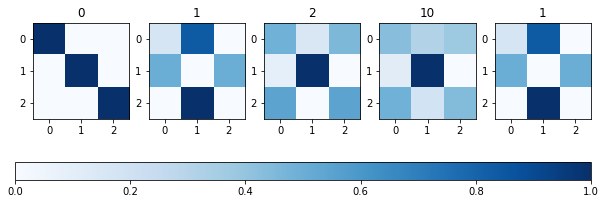

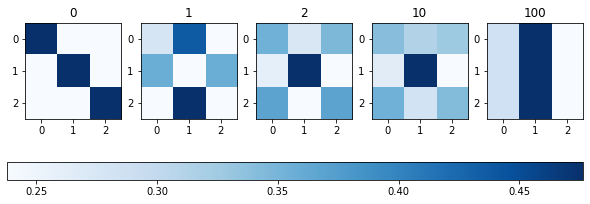

long-term probabilities:     [[0.29 0.48 0.24]
 [0.29 0.48 0.24]
 [0.29 0.48 0.24]]
expected stretch for Alice: , 1.2


In [9]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

def plot_transition_matrix(P, tmax=100):

  # some sanity checks
  assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"

  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
  i=0
  for t in [0,1,2,10,tmax]:
    S=matrix_power(P,t)
    im=ax[i].imshow(S, cmap=plt.cm.Blues)
    ax[i].set_title(t)
    i = i + 1
  cax = fig.add_axes([0.1, 0.2, 0.8, 0.05])
  fig.colorbar(im, cax=cax, orientation='horizontal')
  plt.show()



# initial state distribution
pi_0 = np.array([0.75, 0.25, 0])    
print(pi_0)

# transition matrix
P=np.array([ [1/6, 5/6, 0],
             [1/2, 0, 1/2],
             [0, 1, 0] ])
print(P)
check= np.allclose(P.sum(axis=1), 1)
print(check)

t=1
np.dot(pi_0, matrix_power(P, t))
plot_transition_matrix(P, t)

t=100
np.dot(pi_0, matrix_power(P, t))
plot_transition_matrix(P, t)

print('long-term probabilities:    ', matrix_power(P, 100).round(2))

i=0
exp = 1/(1-P[i,i])
print(f'expected stretch for Alice: , {exp}')

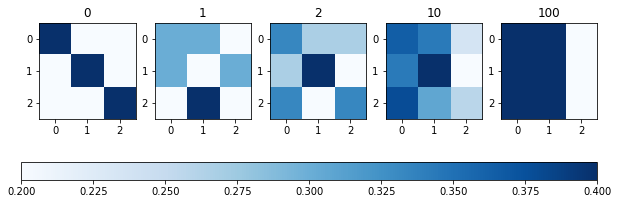

long-term probabilities:     [[0.4 0.4 0.2]
 [0.4 0.4 0.2]
 [0.4 0.4 0.2]]


In [10]:
# transition matrix (non-fair die)
P2=np.array([ [0.5, 0.5, 0],
             [1/2, 0, 1/2],
             [0, 1, 0] ])
t=100
np.dot(pi_0, matrix_power(P2, t))
plot_transition_matrix(P2, t)
print('long-term probabilities:    ', matrix_power(P2, 100).round(2))

Your verbal answers here:
- States: Alice, Bob, and Clemens; Initial state: Father
- There is no stationary distribution for P[0,0] = 0 (Markov chain is periodic). 
- There is an absorbing distribution for P[0,0] = 1.

# Hidden Markov Models

## A story

The DNA of a (hypothetical) organism exists in 3 different configurations (0,1,2) that cannot be observed directly. They are, however, characterized by a specific distribution of observable nucleotides (A,C,G,T) that are emitted from each state. The state transition rates and emission rates are shown in the figure below.
<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/HMM_DNA.jpg",  width="1000">
</div>


This problem can be modelled as a hidden Markov Model.










## Tasks

1. Write down the HMM parameters as numpy arrays. The initial state probability $\pi$ is not given, but you may assume that it is the stationary distribution of state transitions - calculate it and report it.

2. Using MultinomialHMM() from the hmmlearn package, set up a probabilistic model with the parameters $(\pi, P, E)$.

3.  Sample a sequence of 2000 hidden states $Z$ and the corresponding observations $X$ from the model. Use a random seed = 42 for reproducibility.
Report the first 20 pairs of hidden states and observations.


4. Calculate the logarithm of the probability $\log Pr(X)$ given the model from which you generated $X$ - why is it so low (1-2 sentences)?

5. Name two algorithms to decode the "best" possible path of hidden states $Z$ from observations $X$ and a given model. Briefly describe their different goals (2 sentences).
Run the respective function from hmmlearn to calculate 
$Z$ for both methods, given the $X$ and the current model.
Save the result as $Z_1$ and $Z_2$.
Report the number of differences between $Z_1$ and $Z_2$.

6. Use the hmmlearn implementation of the Baum-Welch algorithm to determine the best parameters for the HMM model, if only $X$ is given. 
  - You will have to define a new model that does not yet know any parameters (e.g. model_fit). 
  - You may assume that the number of hidden states is known to be 3.
  - Set "np.random.seed(1)" and run 500 iterations. 
  - Compare the results with your knowlegde of parameters from the generating model for $X$. You might want to round the fitted parameters to two digits: np.round(...,2)
  - Comment on possible difference and name two ways in which you might improve the parameter fit.

In [ ]:
# Install (if necessary)

In [21]:
# pip install hmmlearn

## Load the Software

In [25]:
# import modules you need
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from hmmlearn import hmm
import math

## Your solution

In [26]:
#transitions
P = np.array([ [0.75, 0.25, 0],
               [0, 0.9, 0.1],
               [0.2, 0, 0.8] ]) 



# emission
E = np.array([ [0, 0.5, 0.5, 0],
              [0.25, 0.25, 0.25, 0.25],
              [0.5, 0, 0, 0.5] ]) 
print(E.shape[1])

# statitonary distribution
pi= matrix_power(P, 200)[1,]  
print(f"initial state probability: \n {pi}")


# define model
np.random.seed(42)
model = hmm.MultinomialHMM(n_components=3)
print(model)
model.startprob_ = pi  
model.transmat_  = P                  
model.emissionprob_ = E    


# sample from model
X,Z = model.sample(2000)                   
#print('states Z       =',*Z.flatten())
#print('observations X =',*X.flatten())

print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
# As asked in the task test -> 20 first Z and X
print(f"The first 20 states: {Z[0:20].flatten()}")
print(f"The first 20 observations: {X[0:20].flatten()}")

# log P(X)
print('log P(X) = ', model.score(X))
# this sequence order has a very small probability as it is just one specific 
# instance of numerous permutations


# two ways to predict best path
_, Z1 =model.decode(X, algorithm="viterbi")
_, Z2 =model.decode(X, algorithm="map")

# Check differences
print('differences (Z1-Z):  ', np.sum(Z1 != Z)) 
print('differences (Z2-Z):  ', np.sum(Z2 != Z))

# differences between two paths Z1 and Z2
print('differences (Z1-Z2):  ', np.sum(Z1 != Z2))


# Viterbi maximizes P(Z|X) over *all* Z
# Map: maximizes P(Z_t=i|X) given all previous, present and future observation

# new model for fit
model_fit = hmm.MultinomialHMM(n_components=3) 
model_fit.fit(X) 

# print results
score = model_fit.score(X)
print('fit score:    ', score )


np.random.seed(1)
model_fit = hmm.MultinomialHMM(n_components=3, n_iter=500) 
model_fit.fit(X) 

print('fitted P: \n', np.round(model_fit.transmat_,2))
print('known P: \n', P)
print('\n')
print('fitted E: \n'  , np.round(model_fit.emissionprob_,2))
print('know E: \n', E)

# The Baum-Welch algorithm only delivers local maxima.
# We can change hyperparameters to improve predictions:
# number of iterations, initial estimates, prior assumptions.
# It returns local maxima that may not be globally optimal,
# but of course those local maxima are returned correctly (assuming sufficent number of iterations).

4
initial state probability: 
 [0.21052632 0.52631579 0.26315789]
MultinomialHMM(n_components=3)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
The first 20 states: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2]
The first 20 observations: [3 2 0 3 2 3 0 0 2 1 0 1 3 2 0 0 3 3 0 0]
log P(X) =  -2654.7047341081025
differences (Z1-Z):   351
differences (Z2-Z):   290
differences (Z1-Z2):   203
fit score:     -2675.0072476521154
fitted P: 
 [[0.79 0.2  0.01]
 [0.   0.71 0.29]
 [0.13 0.   0.87]]
known P: 
 [[0.75 0.25 0.  ]
 [0.   0.9  0.1 ]
 [0.2  0.   0.8 ]]


fitted E: 
 [[0.47 0.   0.02 0.51]
 [0.02 0.4  0.58 0.  ]
 [0.24 0.31 0.23 0.23]]
know E: 
 [[0.   0.5  0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.   0.5 ]]


# Artificial Neural Networks




## The Data

The MINST-Fashion dataset contains a large number of (small and coarse-grained) images from fashion items. This set has been annotated with labels for both traing and test data sets.

Link: https://www.tensorflow.org/datasets/catalog/fashion_mnist

The goals is to construct a Neural Network that can predict the fashion label from a given image.

The sections below will describe the individual tasks.

In [28]:
# Install (if necessary)

In [31]:
# pip install tensorflow

In [32]:
# pip install sklearn

## Load Packages

In [33]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix


# a convenience function
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

## Load Data

This section is given purposefully. Simply run it to get train and test data together with the respective labels. 

Also keep the normalization as is.

In [34]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalization
X_train, X_test = X_train / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 4s 1us/step


## Data Exploration and Preprocessing

- How many images (=samples) are included in the training data? 60000
- What is the shape of these images? 28 x 28
- How many distinct labels does it have? 10

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
3
47040000
1
[0 1 2 3 4 5 6 7 8 9]
10


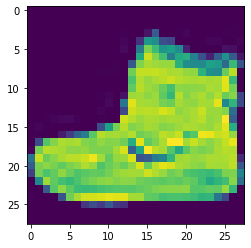

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(X_train.ndim)
print(X_train.size)
print(y_train.ndim)

plt.imshow(X_train[0,])

nc = np.unique(y_train)
print(nc)
nc = np.unique(y_train).size # ten unique classe
print(nc)

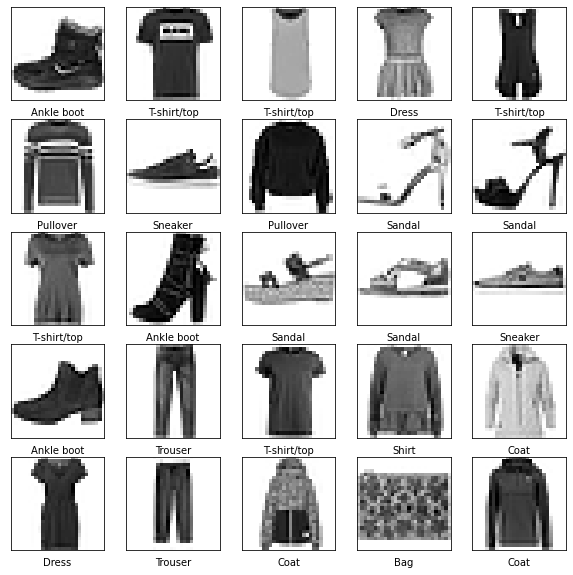

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Define Model and Learning Strategy

Construct an artifical neural network with

- an input layer that takes the proper shape of images
- a dense layer with 128 nodes including a 'ReLu' activation function for non-linear mapping 
- an output layer corresponding to the number of classes in the problem and a softmax activation function

Use the Adam optimizer and define a suitable loss function.
Make sure that during the learning process you will track both loss and 'sparse_categorical_accuracy' as metrics.

Summarize the model. How many parameters does it have?

In [37]:
# Define Model and Learning strategy here
nc = np.unique(y_train).size  # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'

input_shape = X_train.shape[1:]

print('X_train.shape:     ', X_train.shape)
print('input_shape:       ', input_shape)
print('number of classes: ', nc)

model_f = tf.keras.Sequential( name = 'model_fashion')
model_f.add( tf.keras.layers.Flatten(input_shape=input_shape) )                # flattens input to vector 
model_f.add( tf.keras.layers.Dense(128, activation='relu',name='1st_layer') )  # add layer with 128 nodes + relu
model_f.add( tf.keras.layers.Dense(nc, activation='softmax', name='softmax_layer') )

model_f.compile(optimizer='adam', loss=l_name, metrics=a_name)

model_f.summary() # 101770 parameters


X_train.shape:      (60000, 28, 28)
input_shape:        (28, 28)
number of classes:  10
Model: "model_fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

Fit the model to the training data for 10 epochs - 
use 10% of the ttraining data for validation.

Once the fit is finished you may save the model.

In [38]:
fh = model_f.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.1)

In [39]:
model_fn   = 'fashion_mnist_model.h5'   # specifying .h5 generates one h5 file (rather than a directory)
history_fn = 'fashion_minst_history.npy'

model_f.save(model_fn)
np.save(history_fn, fh) 

INFO:tensorflow:Assets written to: ram://8a5d1ff4-653c-4cf3-9511-ece8d46f7e74/assets


## Evaluate the Model

Plot the history of loss and accuracy for the training and validation set and compare it the same metrics obtained (after fitting) for the test data.

Are there any indications for overfitting - explain this briefly (1-2 sentences).

313/313 [==============================] - 0s 1ms/step - loss: 0.3357 - sparse_categorical_accuracy: 0.8867


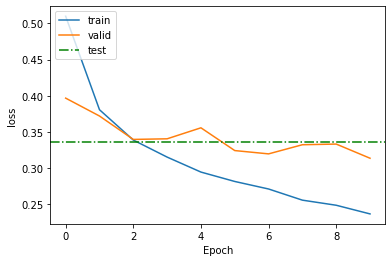

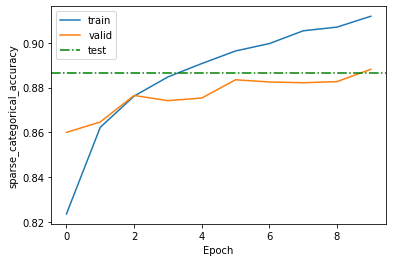

[loss, a_name] =  [0.33566486835479736, 0.8866999745368958]


In [40]:
# Evaluation & Learning history

## Plotting history and test accuracy
def plot_fit_history(fh, name='loss', test_score=0):
  """Plots history of metrics 'name'
  The validation metrics will also be plotted if available as 'val_name' (Keras convention)
  A test_score can be added to compare the evolution"""

  if name not in fh.history:
      print('plot_fit_history: {} is not a key in history !'.format(name))
      return
  val_name = 'val_' + name
  plt.plot(fh.history[name],     label='train')

  if val_name in fh.history:
    # add validation if in data
    plt.plot(fh.history[val_name], label='valid')
  
  plt.axhline(y=test_score, color='green', linestyle='-.',label = 'test')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend(loc='upper left')
  plt.show()

test_loss, test_acc = model_f.evaluate(X_test, y_test)

a_name='sparse_categorical_accuracy'
plot_fit_history(fh, 'loss', test_loss)
plot_fit_history(fh, a_name, test_acc)

# Yes, we do observe overfitting. Based on output, we might want to decrease 
# epochs to 4-5 (have a pict at cross of validation and training curves, validation metrics are still imporving up to 4-5)  

eval = model_f.evaluate(x=X_test, y=y_test, verbose=0)
print('[loss, a_name] = ', eval)

## Inspect predictions

Inspect the training image with index 43 and compare the predicted label with the true label.

Compare all predicted label from the training set with all true labels - you may want to use the plot_cm() funcion defined above.

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 20ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.67 0.   0.33]]


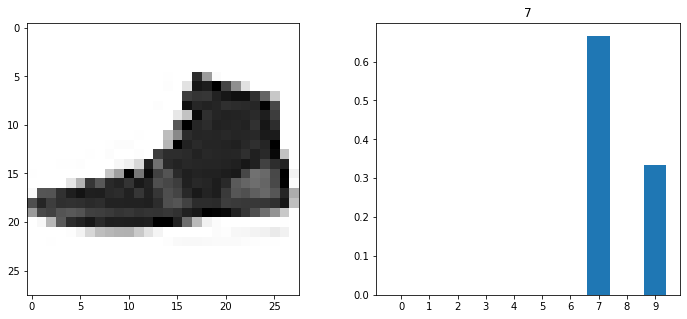

313/313 [==============================] - 0s 1ms/step
[9 2 1 ... 8 1 5]


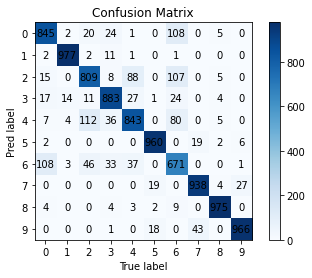

In [44]:
# prediction and inspection for one test image
id=43
img43 = X_test[43]
print(img43.shape)  
img43 = (np.expand_dims(img43,0))
print(img43.shape)
prediction_43 = model_f.predict(img43)
print(prediction_43.round(2))



fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(img43[0], cmap='Greys')
ax[1].bar(range(10), prediction_43[0])
ax[1].set_xticks(range(10))
ax[1].set_title(np.argmax(prediction_43[0]))
plt.show()

# predictions for all test images
model_f_pred = model_f.predict(X_test)
y_pred = np.argmax(model_f_pred, axis=1)  # classes with max prob (= labels)
print(y_pred)

# confusion matrix
cm=confusion_matrix(y_pred, y_test)
plot_cm(cm)

## Suggestions for improvements

Make suggestions for possible improvements to the model and the fitting process

- changing non-linear function
- adding nodes/ reducing nodes
- using a dropout technique (randomly turn off some nodes in the layer based on some probability)
- reconsider convolutional layers